# Chapter10 統計的推定

In [26]:
# ライブラリーの準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
%precision 3
%matplotlib inline

In [27]:
# テストデータの準備
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['点数'])

In [28]:
# 母平均、母分散の表示
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

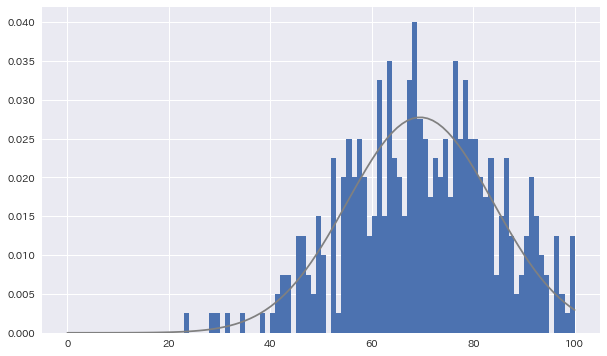

In [29]:
# 全生徒の点数のヒストグラム
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))

ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0, 100), density=True)

plt.show()

In [30]:
# 無作為抽出した20人分の標本データ

np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

In [31]:
# サンプルサイズ20の標本データ * 10,000組

np.random.seed(1111)
n_samples = 10_000
samples = np.random.choice(scores, (n_samples, n))

## 10.1 | 点推定

- 点推定
  - 母平均や母分散といった母数を1つの数値で推定する。

### 10.1.1 母平均の点推定

- 無作為抽出で得た20人のテストの点数は、
  - 期待値 $\mu$、分散 $\sigma^2$ の確率分布にしたがう互いに独立な確率変数 $X_1, X_2, ..., X_20$ と考えることができる。
  - それらから計算される標本平均 $\overline{X} = \frac{X_1 + X_2 + ... + X_n}{n}$ もまた確率変数になっており、試行のたびに得られる結果は異なる。

In [32]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f"{i+1}回目の標本平均: {s_mean:.3f}")

1回目の標本平均: 67.000
2回目の標本平均: 72.850
3回目の標本平均: 69.200
4回目の標本平均: 64.450
5回目の標本平均: 72.650


- 不偏性（unbiasedness）
  - 推定量の期待値が推測したい母数になる性質のこと
- 不偏推定量（unbiased estimator）
  - 不偏性を持っている推定量のこと

標本平均の期待値と分散

確率変数 $X_1, X_2, ..., X_n$ が互いに独立に、期待値 $\mu$ で分散 $\sigma^2$ の確率分布 $F$ にしたがっているとき、

$$
\begin{align*}
E(\overline{X}) &= \mu \\
V(\overline{X}) &= \dfrac{\sigma^2}{n} \\
\end{align*}
$$

が成り立つ。

標本平均 $\overline{X}$ の期待値が母平均 $\mu$ であることを大数の法則を使って確かめる

- 用意した1万組の標本データそれぞれについて標本平均を求める
- 標本平均の平均を計算する

In [33]:
sample_mean = np.mean(samples, axis=1)
p_mean, np.mean(sample_mean)

(69.530, 69.538)

- 一致性（consistency）
  - サンプルサイズ $n$ を増やしていくと推定したい母数に収束していく性質。
- 一致推定量（consistent estimator）
  - 一致性を持った推定量のこと。

- 標本平均は一致推定量でもある。
- サンプルサイズ $n$ を100万にしたときの、標本平均 $\overline{X}$を計算する。

In [34]:
np.mean(
    np.random.choice(scores, int(1e6))
)

69.543

In [35]:
# 20人分の標本データの標本平均
s_mean = np.mean(sample)
s_mean

70.400

### 10.1.2 母分散の点推定

標本平均と同じように、標本分散 $\frac{1}{n} \sum_{i=1}^{n} (X_i - \overline{X})^2$ は確率変数になっているので、試行のたびに結果は変わる。

In [36]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f"{i+1}回目の標本分散: {s_var:.3f}")

1回目の標本分散: 116.800
2回目の標本分散: 162.928
3回目の標本分散: 187.060
4回目の標本分散: 149.148
5回目の標本分散: 111.528


- 標本分散が母分散の不偏推定量になっているかどうか、大数の法則で確かめる。
  - 用意しておいた1万組の標本データそれぞれについて標本分散を求める。
  - 求めた標本分散の平均を計算する。

In [37]:
sample_vars = np.var(samples, axis=1)
p_var, np.mean(sample_vars)

(206.669, 196.344)

- 不偏分散（unbiased variance）$s^2$
  - 母分散の不偏推定量になる推定量
  - 標本分散$S^2$における割る数 $n$ を $n-1$ に置き換える

$$
s^2 = \dfrac{1}{n - 1} \sum_{i=1}^{n} (X_i - \overline{X})^2
$$

- 自由度（degree of freedom）
  - 自由に値を取ることができる変数の数のこと

In [38]:
# 不偏分散の計算
sample_u_vars = np.var(samples, axis=1, ddof=1)
p_var, np.mean(sample_u_vars)

(206.669, 206.678)

- 不偏分散は一致推定量でもある。
- サンプルサイズ $n$ を100万にしたときの、不偏分散 $s^2$を計算する。

In [39]:
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.083

In [40]:
# 20人分の標本データの不偏分散
u_var = np.var(sample, ddof=1)
u_var

158.253

### 10.1.2 点推定のまとめ

- 不偏性（unbiasedness）
  - 期待値が推測したい母数になる性質
- 一致性（consistency）
  - サンプルサイズを増やしていくと、推測したい母数に収束していく性質
- 母平均と母分散の点推定
  - $X_1, X_2, ..., X_n$ が互いに独立に期待値 $\mu$ で分散 $\sigma^2$ であるような確率分布にしたがっているとする。
  - このとき標本平均 $\overline{X}$ と不偏分散 $s^2$ はそれぞれ母平均 $\mu$ と母分散 $\sigma^2$ に対して不偏性と一致性をもつ推定量となる。

## 10.2 | 区間推定

### 10.2.1 正規分布の母平均（分散既知）の区間推定

母集団に正規分布を仮定し、その母分散がわかっている場合の母平均の区間推定

- 標準誤差（standard error）
  - 推定量の標準偏差

- 標本平均 $\overline{X}$ は、$N(\mu, \sigma^2/n)$ に従う。
  - 標本平均という推定量は期待値こそ母平均であるものの標準偏差 $\sqrt{\sigma^2/n}$ でばらついている。
  - このような推定量の標準偏差を**標準誤差**という。

- 標本平均 $\overline{X}$ は $N(\mu, \sigma^2/n)$ に従っているので、
- $Z = (\overline{X} - \mu) / \sqrt{\frac{\sigma^2}{n}}$ という標準化で標準正規分布に変換できる。
- 標準正規分布に変換すると、$100(1-\alpha)\%$ 区間を計算できる。
- $(\overline{X} - \mu) / \sqrt{\frac{\sigma^2}{n}}$ について、95%区間は、

$$
P(z_{0.975} \leq 
(\overline{X} - \mu) / \sqrt{\frac{\sigma^2}{n}} 
\leq z_{0.025}) = 0.95
$$

- 確率変数 $(\overline{X} - \mu) / \sqrt{\frac{\sigma^2}{n}}$ が区間 $[z_{0.975}, z_{0.025}]$ に日ある確率が95%ということ。
- $P$ の中身が $\mu$ についての不等式になるように式変形する。

$$
P(\overline{X} - z_{0.025}\sqrt{\frac{\sigma^2}{n}} \leq 
\mu \leq 
\overline{X} - z_{0.975}\sqrt{\frac{\sigma^2}{n}}) = 0.95
$$

- この式は区間

$$
\left[ ~
\overline{X} - z_{0.025}\sqrt{\frac{\sigma^2}{n}}, ~
\overline{X} - z_{0.975}\sqrt{\frac{\sigma^2}{n}}
~ \right]
$$

- が母平均 $\mu$ を含む確率が95%であると解釈できる。
- これを信頼係数95%の**信頼区間（confidence interval, CI）**
- または、95%信頼区間という。
- 上側信頼限界（upper confidence limit）
  - 信頼区間の上側
- 下側信頼限界（lower confidence limit）
  - 信頼区間の下側

#### 母分散が既知のときの母平均の信頼区間

$X_1, X_2, ..., X_n ~ \sim i.i.d. ~ N(\mu, \sigma^2)$ とする。

このとき母分散 $\sigma^2$ が既知であれば、信頼区間$100(1-\alpha)\%$ の信頼区間は、

$$
\left[ ~
\overline{X} - z_{\alpha/2}\sqrt{\frac{\sigma^2}{n}}, ~
\overline{X} - z_{1-\alpha/2}\sqrt{\frac{\sigma^2}{n}}
~ \right]
$$

となる。

In [41]:
# 20人分の標本データを使って母平均の95%信頼区間を求める

rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, p_mean, ucl


(64.100, 69.530, 76.700)

#### 95%信頼区間の解釈

- 95%の確率で、信頼区間が母平均 $\mu$ を含んでいる。
  - 区間推定を何度も行うと、そのうち95%の区間推定には母平均が含まれるということ。

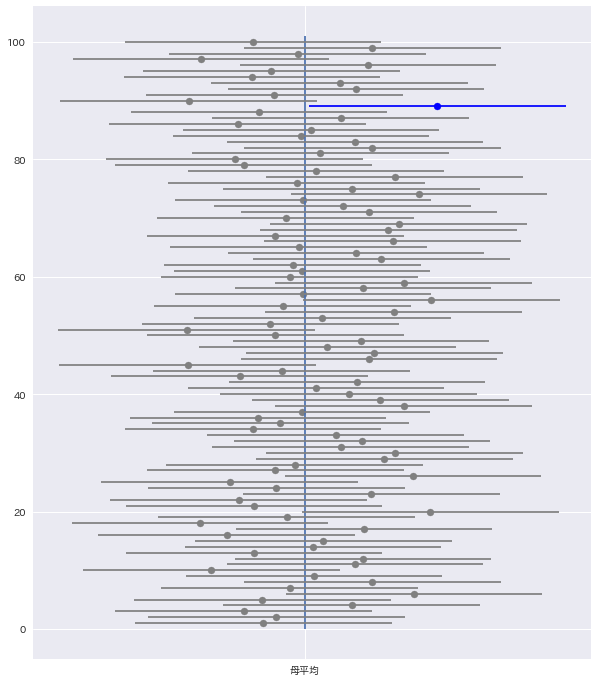

In [42]:
# 図 10.3: 母平均の区間推定のシミュレーション
# 信頼区間の計算を100回行う
# このうち何回、信頼区間内に母平均を含んでいるかを図示する
# 中央の縦線が母平均
# 母平均を含まなかった区間推定を青色にする

fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 100
ax.vlines(p_mean, 0, 101)

for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n) 
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='blue')
        ax.hlines(n_samples-i, lcl, ucl, color='blue')

ax.set_xticks([p_mean])
ax.set_xticklabels(['母平均'])
plt.show()

In [43]:
# 1万回の信頼区間を計算して、信頼区間に母平均が含まれた割合を計算する

rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1

cnt / len(samples)


0.951

### 10.2.2 正規分布の母分散の区間推定

- 母集団に正規分布を仮定
- 母平均はわかっていない
- 母分散の区間推定を行うにあたりゴールとしたいのは、
  - $P(* \leq \sigma^2 \leq) = 0.95$

標本平均 $\overline{X}$ を標準化で標準正規分布にしたがう確率変数に変換したように、不偏分散 $s^2$ もなんらかの変換をして代表的な確率分布にしたがう確率変数を作る必要がある。

- このとき使われるのが「カイ二乗分布」で、
  - 不偏分散 $s^2$ に $Y = (n -1)s^2/\sigma^2$ という変換をすることで
  -  $Y \sim \chi^2(n - 1)$ になることが知られている。

In [44]:
# 用意した1万組の標本データからYの標本データを作る

sample_y = sample_u_vars * (n-1) /p_var
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

Yの標本データのヒストグラムと $\chi^2(n - 1)$ の密度関数を図示する

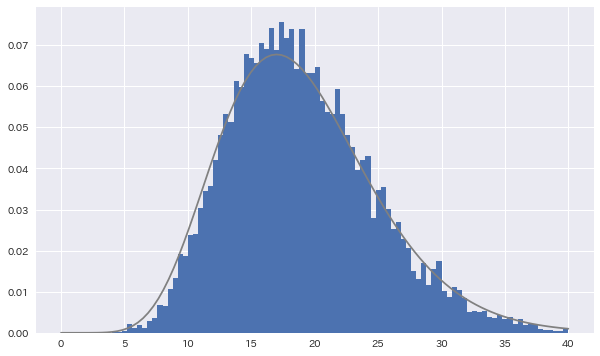

In [45]:
# 図 10.4: 不偏分散とカイ二乗分布

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)

ax.plot(xs, rv.pdf(xs), color='gray')
hist, _, _ = ax.hist(sample_y, bins=100, range=(0, 40), density=True)
plt.show()

母分散の$95\%$信頼区間を求める。

まずは $\chi^2(n - 1)$ の$95\%$区間を求める。

$$
P\left(~ 
    \chi_{0.975}^2(n - 1) ~ \leq ~ 
    \dfrac{(n - 1)s^2}{\sigma^2} ~ \leq ~
    \chi_{0.025}^2(n - 1)
~\right) = 0.95
$$

$P$ の中身が $\sigma^2$ についての不等式になるように式変形する。

$$
P\left(~ 
    \dfrac{(n - 1)s^2}{\chi_{0.025}^2(n - 1)} ~ \leq ~ 
    \sigma^2 ~ \leq ~
    \dfrac{(n - 1)s^2}{\chi_{0.975}^2(n - 1)}
~\right) = 0.95
$$

これで母分散 $\sigma^2$ の信頼係数$95\%$ の信頼区間を、

$$
\left[~
\dfrac{(n - 1)s^2}{\chi_{0.025}^2(n - 1)}, ~ \dfrac{(n - 1)s^2}{\chi_{0.975}^2(n - 1)}
~\right]
$$

と求めることができた。

#### 母分散の信頼区間

$X_1, X_2, ..., X_n ~ \sim{i.i.d} ~ N(\mu, \sigma^2)$ とする。

母平均 $\mu$ が未知のとき、信頼係数 $100(1 - \alpha)\%$ の信頼区間は、

$$
\left[~
\dfrac{(n - 1)s^2}{\chi_{\alpha/2}^2(n - 1)}, ~ 
\dfrac{(n - 1)s^2}{\chi_{1-\alpha/2}^2(n - 1)}
~\right]
$$

で推定される。

In [46]:
# 20人分の標本データを使って母分散の95%信頼区間を求める

rv = stats.chi2(df=n-1)
lcl = (n - 1) * u_var / rv.isf(0.025)
ucl = (n - 1) * u_var / rv.isf(0.975)

lcl, p_var, ucl

(91.525, 206.669, 337.596)

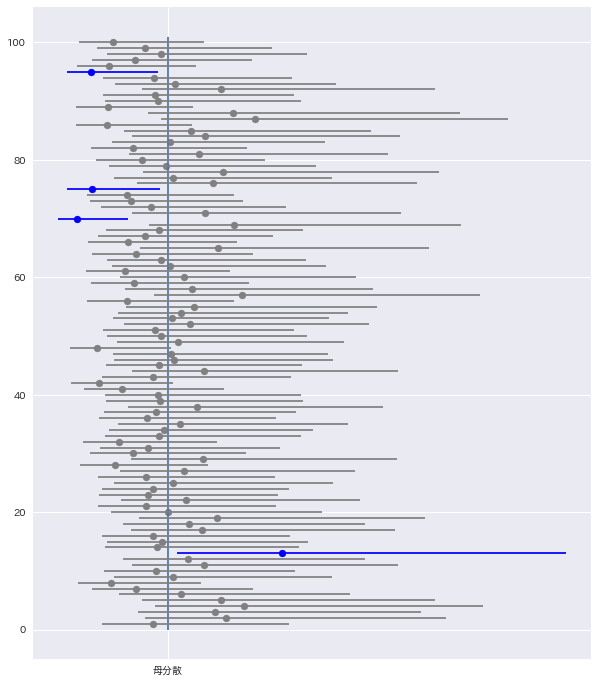

In [48]:
# 図 10.5: 母分散の区間推定のシミュレーション
# 信頼区間の計算を100回行う
# このうち何回、信頼区間内に母分散を含んでいるかを図示する
# 中央の縦線が母分散
# 母分散を含まなかった区間推定を青色にする

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 100
ax.vlines(p_var, 0, 101)

for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n - 1) * u_var_ / rv.isf(0.025)
    ucl = (n - 1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='blue')
        ax.hlines(n_samples-i, lcl, ucl, color='blue')

ax.set_xticks([p_var])
ax.set_xticklabels(['母分散'])
plt.show()


In [49]:
# 1万回の信頼区間を計算して、信頼区間に母分散が含まれた割合を計算する

rv = stats.chi2(df=n-1)
cnt = 0

for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n - 1) * u_var_ / rv.isf(0.025)
    ucl = (n - 1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var<= ucl:
        cnt += 1

cnt / len(samples)


0.964

### 10.2.3 正規分布の母平均（母分散未知）の区間推定
